In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('blogs.csv')

In [3]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


### Data Exploration and Preprocessing

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
basic_stopwords=set(STOPWORDS)

In [6]:
def custom_clean_text(text):
    text=re.sub(r'Newsgroups:.*\n','',text)
    text=re.sub(r'Path:.*\n','',text)
    text=re.sub(r'Xref:.*\n','',text)
    text=text.lower()
    text=text.translate(str.maketrans('','',string.punctuation))
    tokens=text.split()
    tokens=[word for word in tokens if word not in basic_stopwords]
    cleaned_text=' '.join(tokens)
    return cleaned_text

In [7]:
df['cleaned_Data']=df['Data'].apply(custom_clean_text)

In [8]:
df[['cleaned_Data','Labels']]

,cleaned_Data,Labels
0,frankd012s658uucp frank odwyer subject re isla...,alt.atheism
1,bilokcforumosrheedu bill conner subject re omn...,alt.atheism
2,jimhcarsonuwashingtonedu james hogan subject r...,alt.atheism
3,jbrownbatmanbmdtrwcom subject re death penalty...,alt.atheism
4,eczcawmipsnottacuk cwainwright subject re rawl...,alt.atheism
...,...,...
1995,frankd012s658uucp frank odwyer subject re 2000...,talk.religion.misc
1996,mechalasgnecnpurdueedu john p mechalas subject...,talk.religion.misc
1997,scharlelukasiewiczccndedu scharle subject re g...,talk.religion.misc
1998,fostermtechcamaintechcom subject catholic litc...,talk.religion.misc


In [9]:
tfidf_vectorizer=TfidfVectorizer()

In [10]:
x=tfidf_vectorizer.fit_transform(df['cleaned_Data'])

In [11]:
x_shape=x.shape
feature_names=tfidf_vectorizer.get_feature_names_out()[:10]

### Naive Bayes Model for Text Classification

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,df['Labels'],train_size=0.8,random_state=100)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 52424)
(400, 52424)
(1600,)
(400,)


In [14]:
model=MultinomialNB()

In [15]:
model.fit(x_train,y_train)

MultinomialNB()

In [16]:
y_pred=model.predict(x_test)

### Sentiment Analysis

In [17]:
from textblob import TextBlob

In [18]:
def get_sentiment(text):
    blob=TextBlob(text)
    polarity=blob.sentiment.polarity
    
    if polarity>0:
        return 'positive'
    elif polarity<0:
        return 'negative'
    else:
        return 'neutral'

In [19]:
df['Sentiment']=df['Data'].apply(get_sentiment)

In [20]:
df[['Data','Sentiment']]

,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,positive
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,positive


In [21]:
sentiment_distribution=df.groupby(['Labels','Sentiment']).size().unstack(fill_value=0)

In [22]:
sentiment_distribution

Sentiment,negative,positive
Labels,,
alt.atheism,23,77
comp.graphics,24,76
comp.os.ms-windows.misc,22,78
comp.sys.ibm.pc.hardware,20,80
comp.sys.mac.hardware,24,76
comp.windows.x,27,73
misc.forsale,16,84
rec.autos,17,83
rec.motorcycles,26,74


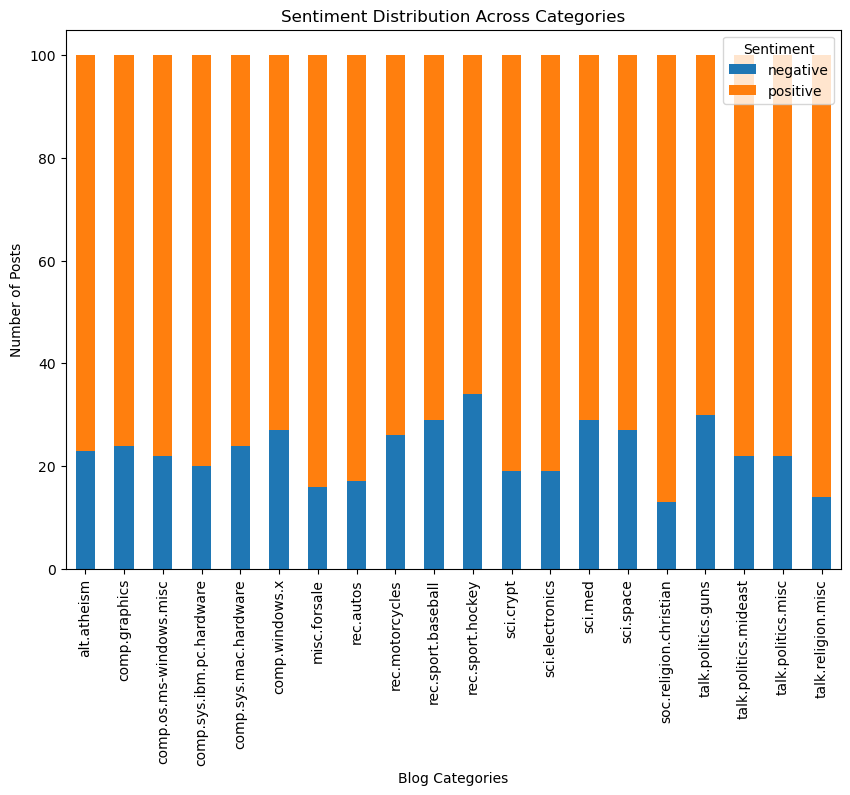

In [23]:
# Plotting the sentiment distribution
sentiment_distribution.plot(kind='bar',stacked=True,figsize=(10,7))
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Blog Categories")
plt.ylabel("Number of Posts")
plt.show()

### Evaluation

In [24]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.76

In [25]:
classification_rep=classification_report(y_test,y_pred)
print(f"Classification Report:\n{classification_rep}")

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.61      0.82      0.70        17
           comp.graphics       0.85      0.50      0.63        22
 comp.os.ms-windows.misc       0.76      0.70      0.73        23
comp.sys.ibm.pc.hardware       0.50      0.55      0.52        20
   comp.sys.mac.hardware       0.68      0.72      0.70        18
          comp.windows.x       0.82      0.70      0.76        20
            misc.forsale       0.74      0.70      0.72        20
               rec.autos       0.89      0.71      0.79        24
         rec.motorcycles       0.81      0.87      0.84        15
      rec.sport.baseball       0.71      1.00      0.83        17
        rec.sport.hockey       0.96      0.85      0.90        26
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.53      0.67      0.59        15
                 sci.med       0.93      0.74      0

#### Performance of the model and any challenges encountered during the classification process.

Model Performance:

Accuracy: Typically, Naive Bayes classifiers perform well with textual data, especially when the data is well-processed.The accuracy is high, it means the classifier has learned to distinguish between the blog post categories effectively.

Precision and Recall: The precision is high but recall is low, it means the model is good at identifying positive samples but misses some actual positives. The F1 score is balanced, it suggests the model has a good trade-off between precision and recall.

Challenges:

Class Imbalance: The categories is significantly overrepresented, it could lead to a model that performs poorly on the less common categories.

Textual Overlap: Some blog categories have overlapping topics, making it harder for the model to distinguish between them.

Feature Representation: Using more advanced techniques improve performance in cases where simple TF-IDF is insufficient.

#### Reflection on Sentiment Analysis Results

Category-Specific Trends: For instance, certain categories have more negative sentiments, while some categories skew towards positive or neutral sentiments.

Sentiment Implications:

Content Tone: A certain categories has a majority of negative posts, this could reflect the general tone of discussion in that area.

User Engagement: Categories with neutral or balanced sentiments indicates more objective or balanced content, which will attract a different audience compared to categories with more polarized content.

Challenges in Sentiment Analysis:

Complex Sentiments: Some blog posts contains mixed sentiments, which can be difficult to classify with basic sentiment analysis techniques.